In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
trades_2015 = pd.read_excel('Data/Trades/Trades 2015.xlsx',sheetname='Trades')

In [3]:
df = trades_2015

In [4]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,1/5/15 11:35 AM,S,143.431,143.409,0.24,0.00,0.24,7510123597
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,1/6/15 10:02 AM,S,143.389,141.540,51.20,0.00,51.20,7510123597
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,1/7/15 12:08 AM,S,143.389,141.036,65.45,0.00,65.45,7510123597
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,1/6/15 10:03 AM,S,118.804,117.807,27.61,-0.08,27.53,7510123597
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,1/7/15 12:09 AM,S,118.804,117.437,38.02,-0.16,37.86,7510123597


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 12 columns):
Ticket #      2120 non-null int64
Symbol        2120 non-null object
Volume        2120 non-null int64
Open          2120 non-null object
Close         2120 non-null object
B/S           2120 non-null object
Sold          2120 non-null float64
Bought        2120 non-null float64
Gross P/L     2120 non-null float64
Rollover      2120 non-null float64
Net P/L       2120 non-null float64
Created By    2120 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 198.8+ KB


In [6]:
df.rename(columns={'Ticket #':'TicketId',
                   'Gross P/L':'GrossPnL','Net P/L':'NetPnL',
                   'Created By':'Account'},
          inplace=True)

In [7]:
df.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,1/5/15 11:35 AM,S,143.431,143.409,0.24,0.00,0.24,7510123597
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,1/6/15 10:02 AM,S,143.389,141.540,51.20,0.00,51.20,7510123597
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,1/7/15 12:08 AM,S,143.389,141.036,65.45,0.00,65.45,7510123597
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,1/6/15 10:03 AM,S,118.804,117.807,27.61,-0.08,27.53,7510123597
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,1/7/15 12:09 AM,S,118.804,117.437,38.02,-0.16,37.86,7510123597


In [8]:
df.Account.unique()

array([7510123597, 7510123538, 7510117642], dtype=int64)

In [9]:
df.Symbol.unique()

array(['EUR/JPY', 'CHF/JPY', 'GBP/AUD', 'GBP/JPY', 'EUR/AUD', 'EUR/CAD',
       'AUD/JPY', 'GBP/CAD', 'EUR/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD',
       'GBP/USD', 'EUR/GBP', 'NZD/USD', 'UKOil', 'USOil', 'UK100',
       'JPN225', 'USDOLLAR', 'XAU/USD', 'SPX500', 'EUSTX50', 'USD/ZAR',
       'USD/TRY', 'USD/NOK', 'GBP/CHF', 'EUR/NZD', 'GBP/NZD', 'ZAR/JPY',
       'EUR/NOK', 'EUR/TRY', 'AUD/NZD', 'TRY/JPY', 'NZD/JPY', 'NZD/CAD',
       'XPT/USD', 'USD/CHF', 'XAG/USD', 'CAD/JPY', 'NZD/CHF', 'XPD/USD',
       'AUD/CHF', 'USD/MXN'], dtype=object)

In [10]:
len(df.Symbol.unique())

44

In [11]:
df.agg({'GrossPnL':sum,
       'Rollover':sum,
       'NetPnL':sum})

GrossPnL   -4854.00
Rollover    -227.03
NetPnL     -5081.03
dtype: float64

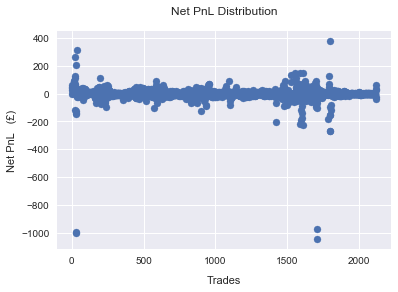

In [12]:
plt.scatter(df.NetPnL.index, df.NetPnL)
plt.title('Net PnL Distribution', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

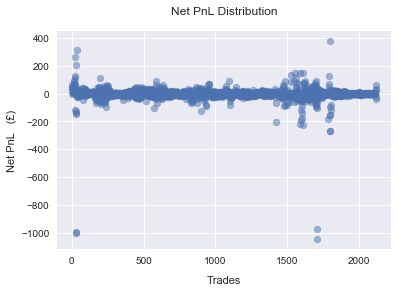

In [13]:
plt.scatter(df.NetPnL.index, df.NetPnL, alpha=0.5)
plt.title('Net PnL Distribution', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

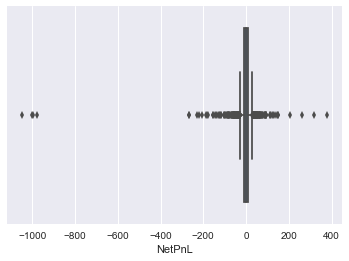

In [14]:
sns.boxplot(df.NetPnL)

In [15]:
df.NetPnL.describe()

count    2120.000000
mean       -2.396712
std        52.893752
min     -1046.040000
25%        -7.805000
50%        -0.210000
75%         7.152500
max       377.580000
Name: NetPnL, dtype: float64

In [16]:
df.sort_values('NetPnL').head(10)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
1706,17495429,USD/CHF,10000,1/14/15 10:00 AM,1/15/15 11:03 AM,B,0.88221,1.02271,-1046.16,0.12,-1046.04,7510123538
29,17477111,CHF/JPY,10000,1/14/15 10:21 AM,1/15/15 10:26 AM,S,114.53600,132.35700,-1002.83,-0.08,-1002.91,7510123597
30,17494716,CHF/JPY,10000,1/14/15 10:21 AM,1/15/15 11:04 AM,S,114.53600,132.19000,-995.23,-0.08,-995.31,7510123597
1705,17476684,USD/CHF,10000,1/14/15 10:00 AM,1/15/15 10:43 AM,B,0.89044,1.02271,-976.62,0.12,-976.50,7510123538
1795,19668181,GBP/JPY,10000,7/8/15 8:13 PM,7/10/15 7:21 PM,S,185.26900,190.35300,-267.08,-1.08,-268.16,7510123538
1796,19696635,GBP/JPY,10000,7/8/15 8:13 PM,7/10/15 7:22 PM,S,185.26900,190.31100,-264.93,-1.08,-266.01,7510123538
1606,21355878,EUR/TRY,9000,12/3/15 10:07 AM,12/3/15 4:30 PM,S,3.04646,3.15687,-227.43,0.00,-227.43,7510123597
1586,21322287,EUR/NZD,11000,12/1/15 9:56 AM,12/3/15 5:49 PM,S,1.59224,1.63794,-221.84,1.57,-220.27,7510123597
1419,20433935,GBP/JPY,15000,9/15/15 7:26 AM,9/17/15 5:43 AM,S,184.55900,187.09600,-203.40,-1.68,-205.08,7510123597
1598,21355633,EUR/USD,8000,12/3/15 9:51 AM,12/3/15 4:32 PM,S,1.05584,1.09106,-186.69,0.00,-186.69,7510123597


In [17]:
df.sort_values('NetPnL', ascending=False).head(10)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
1794,19650459,GBP/JPY,20000,7/7/15 6:24 PM,7/8/15 8:13 PM,S,188.78100,185.27700,378.24,-0.66,377.58,7510123538
33,17478608,EUR/AUD,20000,1/14/15 12:13 PM,1/15/15 12:41 PM,S,1.44596,1.41719,312.19,3.68,315.87,7510123597
20,17461246,EUR/JPY,20000,1/13/15 10:02 AM,1/14/15 10:08 AM,S,139.97800,137.65400,261.27,0.00,261.27,7510123597
27,17476913,EUR/CAD,20000,1/14/15 10:09 AM,1/15/15 12:41 PM,S,1.40641,1.38799,204.08,1.36,205.44,7510123597
1585,21322267,GBP/AUD,10000,12/1/15 9:55 AM,12/3/15 9:20 AM,S,2.06884,2.03842,149.23,1.22,150.45,7510123597
1609,21370549,NZD/CAD,10000,12/3/15 6:40 PM,12/11/15 5:39 PM,B,0.92130,0.89071,146.46,1.44,147.90,7510123597
1557,21179134,EUR/AUD,10000,11/17/15 9:25 AM,11/20/15 5:41 PM,S,1.50119,1.47099,143.92,1.65,145.57,7510123597
1523,21026607,USD/JPY,16000,11/4/15 8:42 AM,11/13/15 9:12 AM,B,122.77300,121.19600,135.02,0.35,135.37,7510123597
19,17461232,GBP/JPY,20000,1/13/15 10:02 AM,1/14/15 10:08 AM,S,179.05400,177.92100,127.36,-0.48,126.88,7510123597
1793,19635465,GBP/JPY,10000,7/6/15 6:49 PM,7/7/15 6:24 PM,S,191.16100,188.77000,126.66,-0.60,126.06,7510123538


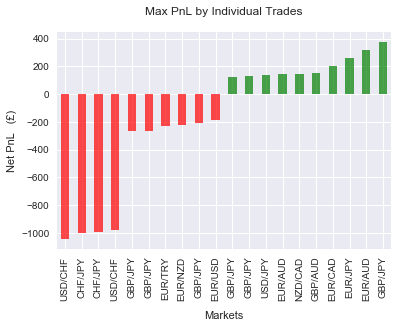

In [18]:
df_ccy_maxPnL = pd.concat([df.sort_values('NetPnL').head(10), df.sort_values('NetPnL').tail(10)])

ax = df_ccy_maxPnL.plot.bar('Symbol','NetPnL',
                      color=np.sign(df_ccy_maxPnL.NetPnL).map({-1:'r', 1:'g'}),
                      legend=False,
                      alpha=0.7)
ax.set_title('Max PnL by Individual Trades', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

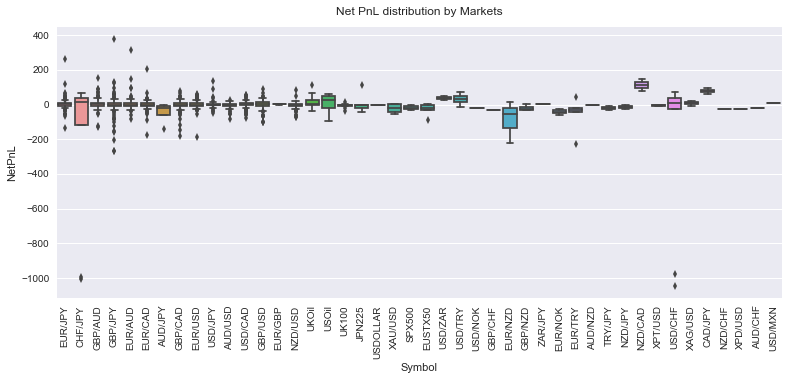

In [21]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.boxplot(data=df, x='Symbol', y='NetPnL', ax=ax)
plt.xticks(rotation=90)
plt.title('Net PnL distribution by Markets', y=1.02)

In [22]:
df_ccyPnL = df.groupby('Symbol', as_index=False)['NetPnL'].sum()
df_ccyPnL.sort_values('NetPnL').head(10)

,Symbol,NetPnL
5,CHF/JPY,-1934.51
31,USD/CHF,-1851.32
18,GBP/JPY,-799.06
16,GBP/CAD,-616.57
25,NZD/USD,-498.79
3,AUD/USD,-329.97
12,EUR/TRY,-284.14
11,EUR/NZD,-263.98
1,AUD/JPY,-179.77
14,EUSTX50,-160.35


In [23]:
df_ccyPnL.sort_values('NetPnL', ascending=False).head(10)

,Symbol,NetPnL
6,EUR/AUD,551.95
9,EUR/JPY,451.70
15,GBP/AUD,433.58
22,NZD/CAD,224.34
29,UKOil,205.31
4,CAD/JPY,155.18
35,USD/TRY,121.76
13,EUR/USD,85.26
36,USD/ZAR,72.56
7,EUR/CAD,63.49


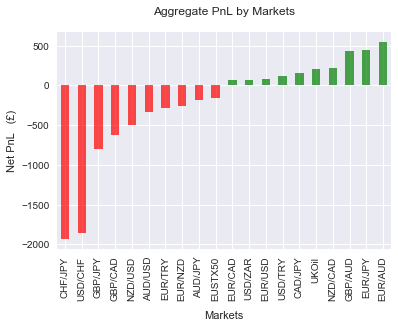

In [24]:
df_ccyPnL_Sum = pd.concat([df_ccyPnL.sort_values('NetPnL').head(10), df_ccyPnL.sort_values('NetPnL').tail(10)])

ax = df_ccyPnL_Sum.plot.bar('Symbol','NetPnL',
                        color=np.sign(df_ccyPnL_Sum.NetPnL).map({-1:'r', 1:'g'}),
                        legend=False,
                        alpha=0.7)
ax.set_title('Aggregate PnL by Markets', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

In [25]:
df.Close = pd.to_datetime(df.Close)
df['Month'] = df.Close.map(lambda x: x.strftime('%b'))
df['Month'] = df.Month.astype('category', categories=
                           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
df_monthPnL = df.groupby('Month', as_index=False)['NetPnL'].sum()
df_monthPnL

,Month,NetPnL
0,Jan,-1974.01
1,Feb,-1064.58
2,Mar,894.90
3,Apr,-343.01
4,May,58.94
5,Jun,-281.42
6,Jul,-567.34
7,Aug,-231.39
8,Sep,-255.54
9,Oct,-225.15


In [26]:
def colorMap(x):
    return 'color: %s' % ('red' if x < 0 else 'white' if x == 0 else 'green')
    
df_monthPnL.style.applymap(colorMap, subset='NetPnL')

,Month,NetPnL
0,Jan,-1974.01
1,Feb,-1064.58
2,Mar,894.9
3,Apr,-343.01
4,May,58.94
5,Jun,-281.42
6,Jul,-567.34
7,Aug,-231.39
8,Sep,-255.54
9,Oct,-225.15


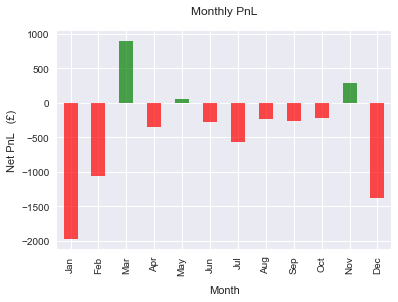

In [27]:
ax = df_monthPnL.plot.bar('Month','NetPnL',
                   color=np.sign(df_monthPnL.NetPnL).map({-1:'r', 1:'g'}),
                   alpha=0.7,
                   legend=False)
ax.set_title('Monthly PnL', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Month', labelpad=10)

In [28]:
df_pt_ccy_month = df.pivot_table(values='NetPnL', index='Symbol', columns='Month', aggfunc=sum,
                      margins=True, margins_name='Total').fillna(0)
df_pt_ccy_month.drop('Total', axis=0, inplace=True)
cols = df_pt_ccy_month.columns

df_ccy_losses = df_pt_ccy_month.sort_values('Total').head(10)
df_ccy_losses.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
CHF/JPY,-1934.51,0,0,0,0,0,0,0,0,0,0,0,-1934.51
USD/CHF,-1831.17,0,0,0,0,0,0,0,0,0,0,-20.15,-1851.32
GBP/JPY,221.49,47.48,69.79,-86.64,-10.93,-43.29,-577.16,-35.69,-155.78,-76.51,-119.11,-32.71,-799.06
GBP/CAD,-126.18,-209.42,-13.41,-7.33,-73.36,-32.37,-38.63,-6.07,-1.69,-60.77,-51.56,4.22,-616.57
NZD/USD,-171.32,-245.47,47.57,-77.25,17.84,-9.66,4.68,-37.85,-18.84,0,-8.49,0,-498.79
AUD/USD,-111.84,-179.88,40.72,-112.35,61.05,-29.92,46.94,-36.29,19.77,-12.86,-15.31,0,-329.97
EUR/TRY,0,0,0,0,0,0,0,0,0,0,0,-284.14,-284.14
EUR/NZD,0,0,0,0,0,0,0,0,0,0,12.12,-276.1,-263.98
AUD/JPY,-147.5,0,0,0,0,0,0,0,0,0,0,-32.27,-179.77


In [29]:
df_ccy_profits = df_pt_ccy_month.sort_values('Total', ascending=False).head(10)
df_ccy_profits.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
EUR/AUD,504.64,33.97,58.43,65.59,-98.6,-49.98,-13.37,-18.55,-1.58,-96.96,227.63,-59.27,551.95
EUR/JPY,560,-156.43,179.27,-41.89,84.87,23.46,-35.89,-50.05,35.77,-4.25,20.04,-163.2,451.7
GBP/AUD,283.01,61.91,6.65,-4.93,-12.02,-99.5,40.56,-118.56,-41.15,108.79,58.37,150.45,433.58
NZD/CAD,0,0,0,0,0,0,0,0,0,0,0,224.34,224.34
UKOil,0,154.93,29.04,0,0,0,0,0,0,21.34,0,0,205.31
CAD/JPY,0,0,0,0,0,0,0,0,0,0,0,155.18,155.18
USD/TRY,0,0,0,0,0,0,0,0,0,0,113.93,7.83,121.76
EUR/USD,310,8.67,249.51,-123.6,9.2,-60.54,-29.5,-40.72,-24.23,0,-1.02,-212.51,85.26
USD/ZAR,0,0,0,0,0,0,0,0,0,0,72.56,0,72.56
